In [35]:
import eagleSqlTools as sql
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [17]:
sim_name = 'RefL0100N1504'
sim_size = 100.
    
# Construct and execute query for each simulation. This query returns the number of galaxies 
# for a given 30 pkpc aperture stellar mass bin (centered with 0.2 dex width). 
myQuery = "SELECT \
            (MAG.u_nodust - MAG.r_nodust) as u_minus_r, \
            log10(AP.Mass_Star) as mass, \
            (AP.SFR/AP.Mass_Star) as ssfr \
           FROM \
            %s_SubHalo as SH, \
            %s_Magnitudes as MAG, \
            %s_Aperture as AP \
           WHERE \
            SH.SnapNum = 27 and \
            SH.SubGroupNumber = 0 and \
            AP.Mass_Star > 1.0e9 and \
            AP.ApertureSize = 30 and \
            SH.GalaxyID = MAG.GalaxyID and \
            SH.GalaxyID = AP.GalaxyID"%(sim_name, sim_name, sim_name)

# Execute query.
myData = sql.execute_query(con, myQuery)

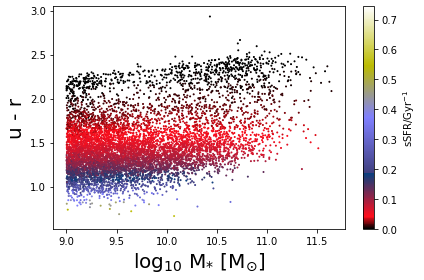

In [46]:
cmap = mpl.cm.gist_stern

plt.scatter(myData['mass'], myData['u_minus_r'], s=1, c = myData['ssfr']*10**9, cmap = cmap)

# Label plot.
plt.xlabel(r'log$_{10}$ M$_{*}$ [M$_{\odot}$]', fontsize=20)
plt.ylabel(r'u - r', fontsize=20)
plt.tight_layout()
#plt.legend()
plt.colorbar(label = r'sSFR/Gyr$^{-1}$')

plt.show()